## Observations and Insights 

In [1]:
#THREE OBSERVATIONS

#ONE
# The are several controlled variables in the study. The mouse body weight is variable,
# but all tumor volumes start at 45 mm3. The sex of the mouse is approximately 50% for 
# each gender (female/male). 

#TWO

# Capomulin and Ramicane clearly have more total timepoints than other drug regimens 
# (Capomulin = 230, Ramicane = 228; Next highest = 188). Since all drug regimens have 
# the same number of participating mice (25 total mice, n=9; 24 total mice, n=1), the 
# total timepoints between drug regimen is adequately relatable and indicates mortality
# experienced during the trial. In essence some of the mice did not complete the study,
# suggesting sacking by euthanasia (ending suffering) or passing by natural causes. 
# It is common practice in preclinical toxicology studies to assign groups and send 
# certain groups to necropsy to understand drug effects on organs. If this was the case
# there would be a swath of dropped timepoints at given timepoints during the study. 
# With that being said, we need to know more information about the study design
# (toxicolgy, safety pharmacology; likely not a pharmacokinetic), but the data indicates
# a lower mortality with Capomulin and Ramicane drug regimens.

#THREE

# There is a strong correlation (r = 0.84) between the average tumor volume (mm3)
# and weight (g) data in the Capomulin Drug Regimen. See Figure C. The take away 
# is that the body weight of the mouse is linked to success of the drug. Since
# all mice were of varying weights but had the same initial tumor volume of 45 mm3,
# the plot in Figure C shows a strong correlation between smaller body weight and 
# tumor volume reduction (drug efficacy).

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import sem


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#first outer join datasets 1&2 to have complete timepoint data from Study_results csv

#mouse_metadata.describe()
#249 mice
#study_results.describe()
#additional mouse data containing multiple timepoints per mouse

#Set index required for merge/join key?
mouse_metadata.set_index('Mouse ID')
study_results.set_index('Mouse ID')
#print(study_results.index)

#join unique from study_results... All unique since data contains timepoint metadata
#simply join both datasets then handle accordingly for each sub objective

#print(mouse_metadata)
#print(study_results)


df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

print(df.head(12))

#successfully merges/joins , merge how inconsequential since every join key has a match? 
#only additional timepoint data in study_results DF

#mouse_metadata.describe()
#len(mouse_metadata["Mouse ID"].unique())
#No repeating Mouse IDs in the data, despite Homework instructions
#In other words mouse_metadata count = 249, len(unique) for same DF = 249 as well

   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      k403     Ramicane    Male          21          16          0   
1      k403     Ramicane    Male          21          16          5   
2      k403     Ramicane    Male          21          16         10   
3      k403     Ramicane    Male          21          16         15   
4      k403     Ramicane    Male          21          16         20   
5      k403     Ramicane    Male          21          16         25   
6      k403     Ramicane    Male          21          16         30   
7      k403     Ramicane    Male          21          16         35   
8      k403     Ramicane    Male          21          16         40   
9      k403     Ramicane    Male          21          16         45   
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   

    Tumor Volume (mm3)  Metastatic Sites  
0            45.000000           

In [3]:
# Checking the number of mice in the DataFrame.
len(df["Mouse ID"].unique())

#Verifies the number of mice is correct after DF merge
#Again, see description above

249

In [4]:
#Checking number mice per study, in a unique way, practice loop/iterative approach
#len(df.groupby(["Drug Regimen", "Mouse ID"]))

df_list = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 
     'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']

for x in df_list:
    df_001 = pd.DataFrame(df.loc[df["Drug Regimen"] == x])
    z = len(df_001["Mouse ID"].unique())
    print(f"{x} has {z} mice in the study")

Ramicane has 25 mice in the study
Capomulin has 25 mice in the study
Infubinol has 25 mice in the study
Placebo has 25 mice in the study
Ceftamin has 25 mice in the study
Stelasyn has 24 mice in the study
Zoniferol has 25 mice in the study
Ketapril has 25 mice in the study
Propriva has 25 mice in the study
Naftisol has 25 mice in the study


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#Not quite sure what this is asking... 
#The duplicate mouse IDs refer to different rows for the same mouse by different timepoint
#Blending and dicing of data later for specific sub objective below

#this isolates information for one mouse using the loc function
df.loc[df['Mouse ID'] == "a203", :]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
459,a203,Infubinol,Female,20,23,25,56.793208,1
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
462,a203,Infubinol,Female,20,23,40,63.593490,2
463,a203,Infubinol,Female,20,23,45,67.973419,2


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
#See above. Uses loc function to accomplish this requirement.


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#group_df = df.groupby(['Mouse ID'])
#group_df, object ; function required to visualize
#group_df.count().head(50)
#Shows some mice must have been terminated or passed during the trial (timepoints != 10)

#Not sure why this is beneficial, essentially just reverting to dataset one,
#as dataset two contains timepoint metadata which is essential, unless the purpose is groupby
#At least shows initial timepoint = 0 values for volume and metastatic sites

df_clean = df.drop_duplicates(subset='Mouse ID')
df_clean.head(20)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
50,s508,Ramicane,Male,1,17,0,45.0,0
60,f966,Capomulin,Male,16,17,0,45.0,0
65,m546,Ramicane,Male,18,16,0,45.0,0
75,z578,Ramicane,Male,11,16,0,45.0,0
85,j913,Ramicane,Female,4,17,0,45.0,0


In [8]:
# Checking the number of mice in the clean DataFrame.
len(df_clean)
#Verified

#The real trick will be appropriately formatting the timepoint DF, mentioned multiple times previously

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
#of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.

#ASSUMPTION: Including all timepoints for statistical evaluation. 
#every mouse in every regimen started with a tumor size of 45 mm3

#Perhaps, final - initial volume would be a better marker of tumor change??? Negative would correlate to tumor shrinking...

#Series then DF?
#Iterate/loop using for condition, average tumor volume and build a DF
#***

#Empty lists for Drug Regimen
Ramicane = [] 
Capomulin = [] 
Infubinol = [] 
Placebo = [] 
Ceftamin = [] 
Stelasyn = [] 
Zoniferol = [] 
Ketapril = [] 
Propriva = [] 
Naftisol = []

#drug_regimen = df["Drug Regimen"].unique()
#print(drug_regimen)

#***Need to figure out variable creation in loops***
#, below code just rewrites over regimen variable
#for regimen in drug_regimen:
#    regimen = []
#    regimen.append([
#        round(np.mean(a["Tumor Volume (mm3)"]), 6), 
#        round(np.median(a["Tumor Volume (mm3)"]), 6), 
#        round(np.var(a["Tumor Volume (mm3)"], ddof=1), 6), 
#        round(np.std(a["Tumor Volume (mm3)"], ddof = 1), 6)])
    #append mean, median, variance, std dev

#Ramicane
a = df.loc[df["Drug Regimen"] == "Ramicane"]
Ramicane.append(["Ramicane"])
Ramicane.append([round(np.mean(a["Tumor Volume (mm3)"]), 6)])
Ramicane.append([round(np.median(a["Tumor Volume (mm3)"]), 6)])
Ramicane.append([round(np.var(a["Tumor Volume (mm3)"], ddof=1), 6)])
Ramicane.append([round(np.std(a["Tumor Volume (mm3)"], ddof = 1), 6)])
Ramicane.append([round(st.sem(a["Tumor Volume (mm3)"], ddof = 1), 6)])

#SEM
#a = pd.DataFrame(df.loc[df["Drug Regimen"] == "Capomulin"])
#a = a["Tumor Volume (mm3)"]
#st.sem(a, axis=0, ddof=1)
#Ramicane.append(["Ramicane"])

#Capomulin
a = df.loc[df["Drug Regimen"] == "Capomulin"]
Capomulin.append(["Capomulin"])
Capomulin.append([round(np.mean(a["Tumor Volume (mm3)"]), 6)])
Capomulin.append([round(np.median(a["Tumor Volume (mm3)"]), 6)])
Capomulin.append([round(np.var(a["Tumor Volume (mm3)"], ddof=1), 6)])
Capomulin.append([round(np.std(a["Tumor Volume (mm3)"], ddof = 1), 6)])                 
Capomulin.append([round(st.sem(a["Tumor Volume (mm3)"], ddof = 1), 6)])
#SEM
#Capomulin.append(["Capomulin"])

#Infubinol
a = df.loc[df["Drug Regimen"] == "Infubinol"]
Infubinol.append(["Infubinol"])
Infubinol.append([round(np.mean(a["Tumor Volume (mm3)"]), 6)])
Infubinol.append([round(np.median(a["Tumor Volume (mm3)"]), 6)])
Infubinol.append([round(np.var(a["Tumor Volume (mm3)"], ddof=1), 6)])
Infubinol.append([round(np.std(a["Tumor Volume (mm3)"], ddof = 1), 6)])                 
Infubinol.append([round(st.sem(a["Tumor Volume (mm3)"], ddof = 1), 6)])
#SEM
#Infubinol.append(["Infubinol"])

#Placebo
a = df.loc[df["Drug Regimen"] == "Placebo"]
Placebo.append(["Placebo"])
Placebo.append([round(np.mean(a["Tumor Volume (mm3)"]), 6)])
Placebo.append([round(np.median(a["Tumor Volume (mm3)"]), 6)])
Placebo.append([round(np.var(a["Tumor Volume (mm3)"], ddof=1), 6)])
Placebo.append([round(np.std(a["Tumor Volume (mm3)"], ddof = 1), 6)])                 
Placebo.append([round(st.sem(a["Tumor Volume (mm3)"], ddof = 1), 6)])
#SEM
#Placebo.append(["Placebo"])

#Ceftamin
a = df.loc[df["Drug Regimen"] == "Ceftamin"]
Ceftamin.append(["Ceftamin"])
Ceftamin.append([round(np.mean(a["Tumor Volume (mm3)"]), 6)])
Ceftamin.append([round(np.median(a["Tumor Volume (mm3)"]), 6)])
Ceftamin.append([round(np.var(a["Tumor Volume (mm3)"], ddof=1), 6)])
Ceftamin.append([round(np.std(a["Tumor Volume (mm3)"], ddof = 1), 6)])                 
Ceftamin.append([round(st.sem(a["Tumor Volume (mm3)"], ddof = 1), 6)])
#SEM
#Ceftamin.append(["Ceftamin"])

#Stelasyn
a = df.loc[df["Drug Regimen"] == "Stelasyn"]
Stelasyn.append(["Stelasyn"])
Stelasyn.append([round(np.mean(a["Tumor Volume (mm3)"]), 6)])
Stelasyn.append([round(np.median(a["Tumor Volume (mm3)"]), 6)])
Stelasyn.append([round(np.var(a["Tumor Volume (mm3)"], ddof=1), 6)])
Stelasyn.append([round(np.std(a["Tumor Volume (mm3)"], ddof = 1), 6)])                 
Stelasyn.append([round(st.sem(a["Tumor Volume (mm3)"], ddof = 1), 6)])
#SEM
#Stelasyn.append(["Stelasyn"])

#Zoniferol
a = df.loc[df["Drug Regimen"] == "Zoniferol"]
Zoniferol.append(["Zoniferol"])
Zoniferol.append([round(np.mean(a["Tumor Volume (mm3)"]), 6)])
Zoniferol.append([round(np.median(a["Tumor Volume (mm3)"]), 6)])
Zoniferol.append([round(np.var(a["Tumor Volume (mm3)"], ddof=1), 6)])
Zoniferol.append([round(np.std(a["Tumor Volume (mm3)"], ddof = 1), 6)])                 
Zoniferol.append([round(st.sem(a["Tumor Volume (mm3)"], ddof = 1), 6)])
#SEM
#Zoniferol.append(["Zoniferol"])

#Ketapril
a = df.loc[df["Drug Regimen"] == "Ketapril"]
Ketapril.append(["Ketapril"])
Ketapril.append([round(np.mean(a["Tumor Volume (mm3)"]), 6)])
Ketapril.append([round(np.median(a["Tumor Volume (mm3)"]), 6)])
Ketapril.append([round(np.var(a["Tumor Volume (mm3)"], ddof=1), 6)])
Ketapril.append([round(np.std(a["Tumor Volume (mm3)"], ddof = 1), 6)])                 
Ketapril.append([round(st.sem(a["Tumor Volume (mm3)"], ddof = 1), 6)])
#SEM
#Ketapril.append(["Ketapril"])

#Propriva
a = df.loc[df["Drug Regimen"] == "Propriva"]
Propriva.append(["Propriva"])
Propriva.append([round(np.mean(a["Tumor Volume (mm3)"]), 6)])
Propriva.append([round(np.median(a["Tumor Volume (mm3)"]), 6)])
Propriva.append([round(np.var(a["Tumor Volume (mm3)"], ddof=1), 6)])
Propriva.append([round(np.std(a["Tumor Volume (mm3)"], ddof = 1), 6)])                 
Propriva.append([round(st.sem(a["Tumor Volume (mm3)"], ddof = 1), 6)])
#SEM
#Propriva.append(["Propriva"])

#Naftisol
a = df.loc[df["Drug Regimen"] == "Naftisol"]
Naftisol.append(["Naftisol"])
Naftisol.append([round(np.mean(a["Tumor Volume (mm3)"]), 6)])
Naftisol.append([round(np.median(a["Tumor Volume (mm3)"]), 6)])
Naftisol.append([round(np.var(a["Tumor Volume (mm3)"], ddof=1), 6)])
Naftisol.append([round(np.std(a["Tumor Volume (mm3)"], ddof = 1), 6)])                 
Naftisol.append([round(st.sem(a["Tumor Volume (mm3)"], ddof = 1), 6)])
#SEM
#Naftisol.append(["Naftisol"])

#*** Another loop through opportunity
#Drug Regimen List 
b = [Ramicane[0], Capomulin[0], Infubinol[0], Placebo[0], Ceftamin[0], 
     Stelasyn[0], Zoniferol[0], Ketapril[0], Propriva[0], Naftisol[0]]
#Mean List
c = [Ramicane[1], Capomulin[1], Infubinol[1], Placebo[1], Ceftamin[1], 
     Stelasyn[1], Zoniferol[1], Ketapril[1], Propriva[1], Naftisol[1]]
#Median List
d = [Ramicane[2], Capomulin[2], Infubinol[2], Placebo[2], Ceftamin[2], 
     Stelasyn[2], Zoniferol[2], Ketapril[2], Propriva[2], Naftisol[2]]
#Variance List
e = [Ramicane[3], Capomulin[3], Infubinol[3], Placebo[3], Ceftamin[3], 
     Stelasyn[3], Zoniferol[3], Ketapril[3], Propriva[3], Naftisol[3]]
#Standard Deviation List
f = [Ramicane[4], Capomulin[4], Infubinol[4], Placebo[4], Ceftamin[4], 
     Stelasyn[4], Zoniferol[4], Ketapril[4], Propriva[4], Naftisol[4]]
#Standard Error of the Mean (SEM) List
g = [Ramicane[5], Capomulin[5], Infubinol[5], Placebo[5], Ceftamin[5], 
     Stelasyn[5], Zoniferol[5], Ketapril[5], Propriva[5], Naftisol[5]]


#print(Ramicane[1])
#print(Capomulin[0])

drug_regimen_df = pd.DataFrame({
    "Drug Regimen": b,
    "Mean": c,
    "Median": d,
    "Variance": e,
    "Standard Deviation": f,
    "SEM": g,
})

print("                    Tumor Volume (mm3)")
drug_regimen_df.head(10)




#b.append(
#    [round(np.mean(a["Tumor Volume (mm3)"]), 6), 
#     round(np.median(a["Tumor Volume (mm3)"]), 6), 
#     round(np.var(a["Tumor Volume (mm3)"], ddof=1), 6), 
#     round(np.std(a["Tumor Volume (mm3)"], ddof = 1), 6)])

#variable creation with while loop using a dictionary
#a = {}
#k = 0
#while k < 10:
#    <dynamically create key> 
#    key = ...
#    <calculate value> 
#    value = ...
#    a[key] = value 
#    k += 1


                    Tumor Volume (mm3)


,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,[Ramicane],[40.216745],[40.673236],[23.486704],[4.846308],[0.320955]
1,[Capomulin],[40.675741],[41.557809],[24.947764],[4.994774],[0.329346]
2,[Infubinol],[52.884795],[51.820584],[43.128684],[6.567243],[0.492236]
3,[Placebo],[54.033581],[52.288934],[61.168083],[7.821003],[0.581331]
4,[Ceftamin],[52.591172],[51.776157],[39.290177],[6.268188],[0.469821]
5,[Stelasyn],[54.233149],[52.431737],[59.450562],[7.710419],[0.573111]
6,[Zoniferol],[53.236507],[51.818479],[48.533355],[6.966589],[0.516398]
7,[Ketapril],[55.235638],[53.698743],[68.553577],[8.279709],[0.60386]
8,[Propriva],[52.322552],[50.854632],[42.35107],[6.50777],[0.512884]
9,[Naftisol],[54.331565],[52.509285],[66.173479],[8.134708],[0.596466]


In [10]:
#test SEM
#nsamples = 25
#div = 20

a = pd.DataFrame(df.loc[df["Drug Regimen"] == "Capomulin"])
a = a["Tumor Volume (mm3)"]
st.sem(a, axis=0, ddof=1)

#a = np.arange(20).reshape(5,4)
#st.sem(a)

#samples = [a.sample(div) for x in range(0,nsamples)]
#sems = [sem() for s in samples]

0.32934562340083096

In [11]:
#test referencing items in a list
#f = []

#f.append("1")
#f.append(2)
#f.append(3)
#f.append(4)
#f[2]

#g = []
#g.append([1,2,3,4])
#g[2]

#append one at a time...
#learn append better to use once and then access the list appended 
#problems indexing multiple items in a list append([1,2,3,4])
#list index out of range error


In [12]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
#of the tumor volume for each regimen

# This method produces everything in a single groupby function.
#Groupby then describe?

#***

#a = []
#a.append("1")
#print(a)

#b = []

#df.loc[df['Mouse ID'] == "a203", :]
#a = df.loc[df["Drug Regimen"] == "Capomulin"]
#round(np.mean(a["Tumor Volume (mm3)"]), 6)

#ddof = 1, per example output ipynb file
#b.append(
#    [round(np.mean(a["Tumor Volume (mm3)"]), 6), 
#     round(np.median(a["Tumor Volume (mm3)"]), 6), 
#     round(np.var(a["Tumor Volume (mm3)"], ddof=1), 6), 
#     round(np.std(a["Tumor Volume (mm3)"], ddof = 1), 6)])

#print(b)

#np.mean(df.loc[df["Drug Regimen"] == "Capomulin"])



In [13]:
df_2 = df.groupby(['Drug Regimen', 'Timepoint'])
df_2.sum()



Age_months  Weight (g)  Tumor Volume (mm3)  \
Drug Regimen Timepoint                                               
Capomulin    0                 351         503         1125.000000   
             5                 351         503         1106.652160   
             10                351         503         1077.107265   
             15                328         480         1009.543616   
             20                306         455          936.475482   
...                            ...         ...                 ...   
Zoniferol    25                200         443          886.926958   
             30                188         416          865.702964   
             35                183         386          841.251211   
             40                183         386          880.833686   
             45                183         386          923.452430   

                        Metastatic Sites  
Drug Regimen Timepoint                    
Capomulin    0                         0  
             5                         4  
             10                        8  
             15                        9  
             20                       15  
...                                  ...  
Zoniferol    25                       27  
             30                       29  
             35                       32  
             40                       39  
             45                       43  

[100 rows x 4 columns]

## Bar Plots

Capomulin Total Timpoints: 230
Ramicane Total Timpoints: 228
188


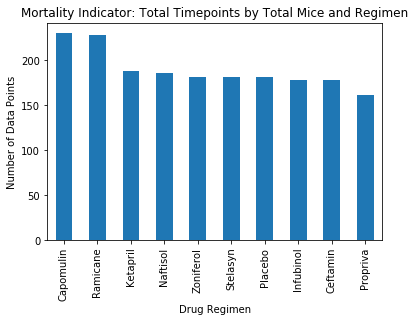

In [14]:
# Generate a bar plot showing the number of mice per time point for each treatment 
#throughout the course of the study using pandas.

a_dp_1 = len(df.loc[df["Drug Regimen"] == "Capomulin"])
a_dp_2 = len(df.loc[df["Drug Regimen"] == "Ramicane"])
a_dp_3 = len(df.loc[df["Drug Regimen"] == "Ketapril"])
a_dp_4 = len(df.loc[df["Drug Regimen"] == "Naftisol"])
a_dp_5 = len(df.loc[df["Drug Regimen"] == "Zoniferol"])
a_dp_6 = len(df.loc[df["Drug Regimen"] == "Stelasyn"])
a_dp_7 = len(df.loc[df["Drug Regimen"] == "Placebo"])
a_dp_8 = len(df.loc[df["Drug Regimen"] == "Infubinol"])
a_dp_9 = len(df.loc[df["Drug Regimen"] == "Ceftamin"])
a_dp_10 = len(df.loc[df["Drug Regimen"] == "Propriva"])

x_axis = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", 
          "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"]
y_axis = [a_dp_1, a_dp_2, a_dp_3, a_dp_4, a_dp_5,
         a_dp_6, a_dp_7, a_dp_8, a_dp_9, a_dp_10]

bar_df = pd.DataFrame({"Drug Regimen": x_axis, "Total Timepoint": y_axis})
bar_df.set_index("Drug Regimen", drop=True, inplace=True)
#print(bar_df)

print(f"Capomulin Total Timpoints: {a_dp_1}")
print(f"Ramicane Total Timpoints: {a_dp_2}")
print(a_dp_3)



bar_plot = bar_df.plot.bar(title = "Mortality Indicator: Total Timepoints by Total Mice and Regimen", legend="")

bar_plot.set(xlabel="Drug Regimen", ylabel="Number of Data Points")

bar_plot


#                xlabel="Drug Regimen")
    
#x = [10,9,8,7,6,5,4,3,2,1])
    
#    x = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", 
#          "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"] )

#bar_df.plot(xticks = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", 
#         "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"])
    
#    x="Drug Regimen", y="Number of Data Points", rot = 45, 
#                title="Mortality Indicator: Total Timepoints by Total Mice and Regimen" )

#plt.bar(x_axis, y_axis)

#bar_df.plot(kind="bar")


#rotate x axis markers, add x and y labels, add title
#plt.title("Mortality Indicator: Total Timepoints by Total Mice and Regimen")
#plt.xlabel("Drug Regimen")
#plt.ylabel("Number of Data Points")
#plt.xticks(rotation='vertical')

#plt.show()


#***

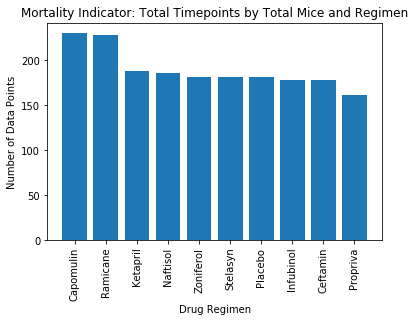

In [15]:
# Generate a bar plot showing the number of mice per time point for each treatment 
#throughout the course of the study using pyplot.

#bar chart from pyplot/matplotlib ... plt.bar(x_axis, y_axis)
#x label, Drug Regimen; y label, Number of Data Points



plt.bar(x_axis, y_axis)

#rotate x axis markers, add x and y labels, add title
plt.title("Mortality Indicator: Total Timepoints by Total Mice and Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation='vertical')

plt.show()


#****

In [16]:
#test groupby for bar charts above
#group = df.groupby(["Drug Regimen"])
#len(group)

#Need for each Drug Regimen; How many total time points (every, total mouse)

#Just use len and loc functions for this task
#len(df.loc[df["Drug Regimen"] == "Capomulin"])

## Pie Plots

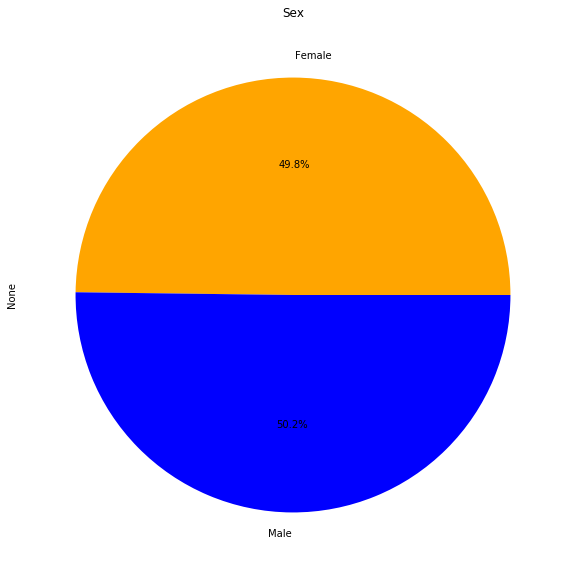

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#print(len(mouse_metadata.loc[mouse_metadata['Sex'] == "Female", :]))
#print(len(mouse_metadata.loc[mouse_metadata['Sex'] == "Male", :]))

Female = len(mouse_metadata.loc[mouse_metadata['Sex'] == "Female", :])
Male = len(mouse_metadata.loc[mouse_metadata['Sex'] == "Male", :])

#print(f"Female count: {Female}; Male count: {Male}")

Sex_py = pd.Series([Female, Male])
#print(Sex_py)

#DF.plot(kind="pie", figsize=(20,3)) -- Using pandas

Sex_py.plot(kind="pie", labels=["Female","Male"],autopct="%1.1f%%",
            colors = ["orange", "blue"],title="Sex", legend="", figsize=(10,10))

#Ran into error, ValueError: pie requires either y column or 'subplots=True'
#Created a series instead of a DF as a work around

#Why does it say 'None' to the left of the chart?

#***

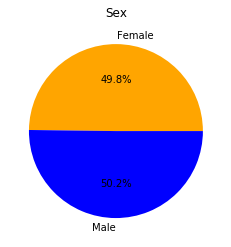

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Same as above, just using pyplot

#plt.pie(Female, Male)
Sex = [Female, Male]
Sex_2 = ["Female", "Male"]
colors = ["orange", "blue"]
explode = [0, 0.05, 0, 0]

plt.pie(Sex, labels=Sex_2, colors=colors, autopct="%1.1f%%")
plt.title("Sex")
#Use import ... from matplotlib.pyplot import figure
#i.e. figure(figsize=(10,10))?
plt.show()


#Nearly fifty fifty split

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Four most promising are Capomulin, Ramicane, Infubinol and Ceftamin by Statistical Summary Analysis

#Capomulin
#capo = df.loc[df["Drug Regimen"] == "Capomulin"]
#capo2 = capo.loc[capo["Timepoint"] == 45]
#len(capo2)

#Checking remaining mice in each drug regimen
df_list = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 
     'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']

for x in df_list:
    df_001 = df.loc[df["Drug Regimen"] == x]
    df_002 = df_001.loc[df_001["Timepoint"] == 45]
    z = len(df_002)
    print(f"{x} has {z} mice left")

#Judging by mice left, four most promising are Ramicane, Capomulin, Zoniferol and Ceftamin/Naftisol
#Analysis will go ahead and cover Capomulin, Ramicane, Infubinol and Ceftamin


Ramicane has 20 mice left
Capomulin has 21 mice left
Infubinol has 9 mice left
Placebo has 11 mice left
Ceftamin has 13 mice left
Stelasyn has 11 mice left
Zoniferol has 14 mice left
Ketapril has 11 mice left
Propriva has 7 mice left
Naftisol has 13 mice left


In [20]:
### SEE PAST ALL COMMENTED OUT CODE

# #Capomulin Outliers

# #timepoints = [0,5,10,15,20,25,30,35,40,45]

# #mouselist_capo_v = []

# #df_101 = df.loc[df['Drug Regimen'] == 'Capomulin']
# #mouselist_capo1 = df_101['Mouse ID'].unique()

# #for x in mouselist_capo1:
# #    print(x)
# #    df_102 = df_101.loc[df_101['Mouse ID'] == x]
    
    
# #    for y in timepoints:
# #        print(y)
        

# #        if df_102.loc[df_102['Timepoint'] == y + 5].empty == True:
# #            
# #            df_103 = pd.DataFrame(df_102.loc[df_102['Timepoint'] == y])
# #            print(float(df_103["Tumor Volume (mm3)"]))
# #            mouselist_capo_v.append(float(df_103["Tumor Volume (mm3)"]))
# #            break
 
# #capo3 = mouselist_capo_v

# capo = df.loc[df["Drug Regimen"] == "Capomulin"]
# capo2 = pd.DataFrame(capo.loc[capo["Timepoint"] == 45])
# capo3 = capo2["Tumor Volume (mm3)"]

# #capo2["Tumor Volume (mm3)"]

# #capo_list = [23,28,28,31,31,32,33,34,37,36,37,38,38,38,38,40,40,40,41,41,47]
# #use capo2?

# quartiles = capo3.quantile([.25,.5, .75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile of Capomulin is: {round(lowerq,2)}")
# print(f"The upper quartile of Capomulin is: {round(upperq,2)}")
# print(f"The interquartile range of Capomulin is: {round(iqr,2)}")
# print(f"The median of Capomulin is: {round(quartiles[0.5],2)}")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)    
# print(f"Values below {round(lower_bound,2)} could be outliers.")
# print(f"Values above {round(upper_bound,2)} could be outliers.")
# print("")

# capo_outlier = []

# for x in capo3:
#     if x < lower_bound:
#         print(f"{x} is an outlier")
#         capo_outlier.append(x)
#     elif x > upper_bound:
#         print(f"{x} is an outlier")
#         capo_outlier.append(x)

# if not capo_outlier:
#     print(f"Capomulin has no outliers")
      

In [21]:
# #Ramicane Outliers

# rami = df.loc[df["Drug Regimen"] == "Ramicane"]
# rami2 = pd.DataFrame(rami.loc[rami["Timepoint"] == 45])
# rami3 = rami2["Tumor Volume (mm3)"]

# #capo2["Tumor Volume (mm3)"]

# #capo_list = [23,28,28,31,31,32,33,34,37,36,37,38,38,38,38,40,40,40,41,41,47]
# #use capo2?

# quartiles = rami3.quantile([.25,.5, .75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile of Ramicane is: {round(lowerq,2)}")
# print(f"The upper quartile of Ramicane is: {round(upperq,2)}")
# print(f"The interquartile range of Ramicane is: {round(iqr,2)}")
# print(f"The median of Ramicane is: {round(quartiles[0.5],2)}")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)    
# print(f"Values below {round(lower_bound,2)} could be outliers.")
# print(f"Values above {round(upper_bound,2)} could be outliers.")
# print("")

# rami_outlier = []

# for x in rami3:
#     if x < lower_bound:
#         print(f"{x} is an outlier")
#         rami_outlier.append(x)
#     elif x > upper_bound:
#         print(f"{x} is an outlier")
#         rami_outlier.append(x)

# if not rami_outlier:
#     print(f"Ramicane has no outliers")

In [22]:
#Infubinol Outliers

# infu = df.loc[df["Drug Regimen"] == "Infubinol"]
# infu2 = pd.DataFrame(infu.loc[infu["Timepoint"] == 45])
# infu3 = infu2["Tumor Volume (mm3)"]

# print(infu3)
# #capo2["Tumor Volume (mm3)"]

# #capo_list = [23,28,28,31,31,32,33,34,37,36,37,38,38,38,38,40,40,40,41,41,47]
# #use capo2?

# quartiles = infu3.quantile([.25,.5, .75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile of Infubinol is: {round(lowerq,2)}")
# print(f"The upper quartile of Infubinol is: {round(upperq,2)}")
# print(f"The interquartile range of Infubinol is: {round(iqr,2)}")
# print(f"The median of Infubinol is: {round(quartiles[0.5],2)}")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)    
# print(f"Values below {round(lower_bound,2)} could be outliers.")
# print(f"Values above {round(upper_bound,2)} could be outliers.")
# print("")

# infu_outlier = []

# for x in infu3:
#     if x < lower_bound:
#         print(f"{x} is an outlier")
#         infu_outlier.append(x)
#     elif x > upper_bound:
#         print(f"{x} is an outlier")
#         infu_outlier.append(x)

# if not infu_outlier:
#     print(f"Infubinol has no outliers")

In [23]:
#Ceftamin Outliers

# ceft = df.loc[df["Drug Regimen"] == "Ceftamin"]
# ceft2 = pd.DataFrame(ceft.loc[ceft["Timepoint"] == 45])
# ceft3 = ceft2["Tumor Volume (mm3)"]

# #capo2["Tumor Volume (mm3)"]

# #capo_list = [23,28,28,31,31,32,33,34,37,36,37,38,38,38,38,40,40,40,41,41,47]
# #use capo2?

# quartiles = ceft3.quantile([.25,.5, .75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile of Ceftamin is: {round(lowerq,2)}")
# print(f"The upper quartile of Ceftamin is: {round(upperq,2)}")
# print(f"The interquartile range of Ceftamin is: {round(iqr,2)}")
# print(f"The median of Ceftamin is: {round(quartiles[0.5],2)}")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)    
# print(f"Values below {round(lower_bound,2)} could be outliers.")
# print(f"Values above {round(upper_bound,2)} could be outliers.")
# print("")

# ceft_outlier = []

# for x in ceft3:
#     if x < lower_bound:
#         print(f"{x} is an outlier")
#         ceft_outlier.append(x)
#     elif x > upper_bound:
#         print(f"{x} is an outlier")
#         ceft_outlier.append(x)

# if not ceft_outlier:
#     print(f"Ceftamin has no outliers")

In [24]:
# The output example has an Outlier for Infubinol.
# Perhaps the instructions intended the code to grab the final timepoint for each mouse.
# In other words, not just T = 45 days.

#loop through for each mouse to find end point, value and build/append list

# timepoints = [0,5,10,15,20,25,30,35,40,45]

# mouselist_capo_v = []
# mouselist_rami_v = []
# mouselist_infu_v = []
# mouselist_ceft_v = []

# df_101 = df.loc[df['Drug Regimen'] == 'Capomulin']
# mouselist_capo1 = df_101['Mouse ID'].unique()

# for x in mouselist_capo1:
#     #print(x)
#     df_102 = df_101.loc[df_101['Mouse ID'] == x]
    
    
#     for y in timepoints:
#         #print(y)
        

#         if df_102.loc[df_102['Timepoint'] == y + 5].empty == True:
            
#             df_103 = pd.DataFrame(df_102.loc[df_102['Timepoint'] == y])
#             #print(float(df_103["Tumor Volume (mm3)"]))
#             mouselist_capo_v.append(float(df_103["Tumor Volume (mm3)"]))
#             break

# #if a.loc[a['bus'] == 5].empty == True:
# #    print("Nope")
            
# #Either none isn't working
# #Or break isn't working

# print(mouselist_capo_v)

# capo3 = pd.DataFrame({"Tumor Volume (mm3)" : mouselist_capo_v})

#capo3

#quartiles = capo3["Tumor Volume (mm3)"].quantile([.25,.5, .75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq

#print(f"The lower quartile of Capomulin is: {round(lowerq,2)}")
#print(f"The upper quartile of Capomulin is: {round(upperq,2)}")
#print(f"The interquartile range of Capomulin is: {round(iqr,2)}")
#print(f"The median of Capomulin is: {round(quartiles[0.5],2)}")

#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)    
#print(f"Values below {round(lower_bound,2)} could be outliers.")
#print(f"Values above {round(upper_bound,2)} could be outliers.")
#print("")

#capo_outlier = []

#for x in capo3["Tumor Volume (mm3)"]:
#    if x < lower_bound:
#        print(f"{x} is an outlier")
#        capo_outlier.append(x)
#    elif x > upper_bound:
#        print(f"{x} is an outlier")
#        capo_outlier.append(x)

#if not capo_outlier:
#    print(f"Capomulin has no outliers")
    
#print(capo_outlier)

In [25]:
#Capomulin Outliers

timepoints = [0,5,10,15,20,25,30,35,40,45]

mouselist_capo_v = []
mouselist_rami_v = []
mouselist_infu_v = []
mouselist_ceft_v = []

df_101 = df.loc[df['Drug Regimen'] == 'Capomulin']
mouselist_capo1 = df_101['Mouse ID'].unique()

for x in mouselist_capo1:

    df_102 = df_101.loc[df_101['Mouse ID'] == x]
    
    
    for y in timepoints:        

        if df_102.loc[df_102['Timepoint'] == y + 5].empty == True:
            
            df_103 = pd.DataFrame(df_102.loc[df_102['Timepoint'] == y])
            
            mouselist_capo_v.append(float(df_103["Tumor Volume (mm3)"]))
            break


print(mouselist_capo_v)

capo3 = pd.DataFrame({"Tumor Volume (mm3)" : mouselist_capo_v})

capo3

quartiles = capo3["Tumor Volume (mm3)"].quantile([.25,.5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin is: {round(lowerq,2)}")
print(f"The upper quartile of Capomulin is: {round(upperq,2)}")
print(f"The interquartile range of Capomulin is: {round(iqr,2)}")
print(f"The median of Capomulin is: {round(quartiles[0.5],2)}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)    
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")
print("")

capo_outlier = []

for x in capo3["Tumor Volume (mm3)"]:
    if x < lower_bound:
        print(f"{x} is an outlier")
        capo_outlier.append(x)
    elif x > upper_bound:
        print(f"{x} is an outlier")
        capo_outlier.append(x)

if not capo_outlier:
    print(f"Capomulin has no outliers")
    
print(capo_outlier)

[23.34359787, 28.48403281, 28.43096411, 30.48598484, 31.02392294, 31.896238399999998, 32.37735684, 33.32909778, 34.45529799, 37.31184577, 36.04104736, 37.07402422, 38.84687569, 38.93963263, 38.98287774, 38.75326548, 38.125164399999996, 39.95234669, 40.65812366, 40.1592203, 40.72857787, 41.48300765, 41.58152074, 47.68596303, 46.53920617]
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The median of Capomulin is: 38.13
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.

Capomulin has no outliers
[]


In [26]:
#Ramicane Outliers

timepoints = [0,5,10,15,20,25,30,35,40,45]

mouselist_rami_v = []

df_101 = df.loc[df['Drug Regimen'] == 'Ramicane']
mouselist_rami1 = df_101['Mouse ID'].unique()

for x in mouselist_rami1:

    df_102 = df_101.loc[df_101['Mouse ID'] == x]
    
    
    for y in timepoints:        

        if df_102.loc[df_102['Timepoint'] == y + 5].empty == True:
            
            df_103 = pd.DataFrame(df_102.loc[df_102['Timepoint'] == y])
            
            mouselist_rami_v.append(float(df_103["Tumor Volume (mm3)"]))
            break


print(mouselist_rami_v)

rami3 = pd.DataFrame({"Tumor Volume (mm3)" : mouselist_rami_v})

rami3

quartiles = rami3["Tumor Volume (mm3)"].quantile([.25,.5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {round(lowerq,2)}")
print(f"The upper quartile of Ramicane is: {round(upperq,2)}")
print(f"The interquartile range of Ramicane is: {round(iqr,2)}")
print(f"The median of Ramicane is: {round(quartiles[0.5],2)}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)    
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")
print("")

rami_outlier = []

for x in rami3["Tumor Volume (mm3)"]:
    if x < lower_bound:
        print(f"{x} is an outlier")
        rami_outlier.append(x)
    elif x > upper_bound:
        print(f"{x} is an outlier")
        rami_outlier.append(x)

if not rami_outlier:
    print(f"Ramicane has no outliers")
    
print(rami_outlier)

[22.05012627, 29.12847181, 30.27623175, 30.56462509, 30.63869575, 31.56046955, 31.09533505, 33.39765251, 32.97852192, 33.56240217, 36.13485243, 38.81036633, 37.22565033, 36.37451039, 36.56165229, 37.31123552, 38.34200823, 38.407618299999996, 40.65900627, 40.66771292, 45.22086888, 43.04754260000001, 43.41938077, 43.16637266, 44.18345092]
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The median of Ramicane is: 36.56
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.

Ramicane has no outliers
[]


In [27]:
#Infubinol Outliers

timepoints = [0,5,10,15,20,25,30,35,40,45]

mouselist_infu_v = []

df_101 = df.loc[df['Drug Regimen'] == 'Infubinol']
mouselist_infu1 = df_101['Mouse ID'].unique()

for x in mouselist_infu1:

    df_102 = df_101.loc[df_101['Mouse ID'] == x]
    
    
    for y in timepoints:        

        if df_102.loc[df_102['Timepoint'] == y + 5].empty == True:
            
            df_103 = pd.DataFrame(df_102.loc[df_102['Timepoint'] == y])
            
            mouselist_infu_v.append(float(df_103["Tumor Volume (mm3)"]))
            break


print(mouselist_infu_v)

infu3 = pd.DataFrame({"Tumor Volume (mm3)" : mouselist_infu_v})

infu3

quartiles = infu3["Tumor Volume (mm3)"].quantile([.25,.5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol is: {round(lowerq,2)}")
print(f"The upper quartile of Infubinol is: {round(upperq,2)}")
print(f"The interquartile range of Infubinol is: {round(iqr,2)}")
print(f"The median of Infubinol is: {round(quartiles[0.5],2)}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)    
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")
print("")

infu_outlier = []

for x in infu3["Tumor Volume (mm3)"]:
    if x < lower_bound:
        print(f"{x} is an outlier")
        infu_outlier.append(x)
    elif x > upper_bound:
        print(f"{x} is an outlier")
        infu_outlier.append(x)

if not infu_outlier:
    print(f"Infubinol has no outliers")
    
print(infu_outlier)

[67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309, 36.321345799999996, 60.96971133, 62.43540402, 60.91876652, 67.28962147, 66.19691151, 62.11727887, 47.01036401, 60.16518046, 55.62942846, 45.69933088, 54.65654872, 55.65068132, 46.25011212, 54.04860769, 51.54243058, 50.00513807, 58.26844248, 67.68556862, 62.75445141]
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The median of Infubinol is: 60.17
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.

36.321345799999996 is an outlier
[36.321345799999996]


In [28]:
#Ceftamin Outliers

timepoints = [0,5,10,15,20,25,30,35,40,45]

mouselist_ceft_v = []

df_101 = df.loc[df['Drug Regimen'] == 'Ceftamin']
mouselist_ceft1 = df_101['Mouse ID'].unique()

for x in mouselist_ceft1:

    df_102 = df_101.loc[df_101['Mouse ID'] == x]
    
    
    for y in timepoints:        

        if df_102.loc[df_102['Timepoint'] == y + 5].empty == True:
            
            df_103 = pd.DataFrame(df_102.loc[df_102['Timepoint'] == y])
            
            mouselist_ceft_v.append(float(df_103["Tumor Volume (mm3)"]))
            break


print(mouselist_ceft_v)

ceft3 = pd.DataFrame({"Tumor Volume (mm3)" : mouselist_ceft_v})

ceft3

quartiles = ceft3["Tumor Volume (mm3)"].quantile([.25,.5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin is: {round(lowerq,2)}")
print(f"The upper quartile of Ceftamin is: {round(upperq,2)}")
print(f"The interquartile range of Ceftamin is: {round(iqr,2)}")
print(f"The median of Ceftamin is: {round(quartiles[0.5],2)}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)    
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")
print("")

ceft_outlier = []

for x in ceft3["Tumor Volume (mm3)"]:
    if x < lower_bound:
        print(f"{x} is an outlier")
        ceft_outlier.append(x)
    elif x > upper_bound:
        print(f"{x} is an outlier")
        ceft_outlier.append(x)

if not ceft_outlier:
    print(f"Ceftamin has no outliers")
    
print(ceft_outlier)

[62.99935619, 45.0, 56.05774909, 55.74282869, 48.72207785, 47.784681799999994, 61.84902336, 68.92318457, 67.74866174, 57.91838132, 46.78453491, 59.85195552, 64.29983003, 59.74190064, 61.43389223, 64.19234114, 45.0, 52.92534846, 45.0, 67.52748237, 45.0, 64.63494887, 61.38666032, 68.59474498, 64.72983655]
The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.3
The interquartile range of Ceftamin is: 15.58
The median of Ceftamin is: 59.85
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.

Ceftamin has no outliers
[]


In [29]:
#df_101 = df.loc[df['Drug Regimen'] == 'Capomulin']
#df_102 = df_101.loc[df["Mouse ID"] == 's185']
#df_103 = df_102.loc[df_102["Timepoint"] == 45]

#float(df_103["Tumor Volume (mm3)"])            
    
    
#a = pd.DataFrame({"a":[1,2,3,4]})
#if a.loc[a["a"] == 4] is None:
#    print("not found")
#else: 
#    print("found")

#for x in timepoints:
    

#mouselist_capo

#df_101['Mouse ID'].unique()
#for x in timepoints:

#Then find outlier

#mouselist_capo_v[0]

#if mouselist_capo_v[0] > 1:
#    print("test")

#capo3 = pd.DataFrame({"Tumor Volume (mm3)" : [mouselist_capo_v]})

#capo3.dtypes


In [30]:
#test break in nested for loops
#break stops current loop, not outer loop
#a = [1,2,3,4]
#b = [5,6,7,8]

#for x in a:
#    print(x)
#    for y in b:
#        print(y)
#        if y > 6:
#            break

#df_101 = df.loc[df["Drug Regimen"] == "Capomulin"]
#df_102 = df_101.loc[df_101["Mouse ID"] == "s185"]
#a = df_102.loc[df_102["Timepoint"] == 50]
#if df_102.loc[df_102["Timepoint"] == 50] is None:
#    print("No Value!")
#    else 
#    print("Value!")
    
#df_102


#test no value loc
#a = pd.DataFrame({"a":[1,2,3,4]})
#if a.loc[a["a"] == 4] is None:
#    print("not found")
#else: 
#    print("found")

#df_101 = df.loc[df['Drug Regimen'] == 'Capomulin']
#df_102 = df_101.loc[df["Mouse ID"] == 's185']
#df_103 = df_102.loc[df_102["Timepoint"] == 45]

#float(df_103["Tumor Volume (mm3)"])

#test None
#a = pd.DataFrame({"bus" : [1,2,3,4], "purses" : [55,66,77,88]})

#b = a.loc[a['bus'] == 5]

#print(b)

#if a.loc[a['bus'] == 5].empty == True:
#    print("Nope")

    


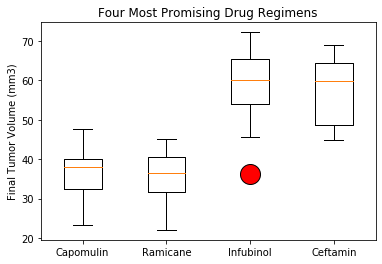

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

flierprops = dict(marker='o', markerfacecolor='red', markersize=20,
                  linestyle='none')

#capo3, rami3, infu3, ceft3

data_to_plot = [capo3["Tumor Volume (mm3)"], rami3["Tumor Volume (mm3)"], 
                infu3["Tumor Volume (mm3)"], ceft3["Tumor Volume (mm3)"]]

fig1, ax1 = plt.subplots()
ax1.set_title('Four Most Promising Drug Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(data_to_plot, flierprops=flierprops)


ax1.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

#find how to change Infubinol outlier color and style


## Line and Scatter Plots

    Timepoint  Tumor Volume (mm3)
10          0           45.000000
11          5           43.878496
12         10           37.614948
13         15           38.177232
14         20           36.866876
15         25           33.949940
16         30           32.959671
17         35           28.328531
18         40           25.472143
19         45           23.343598


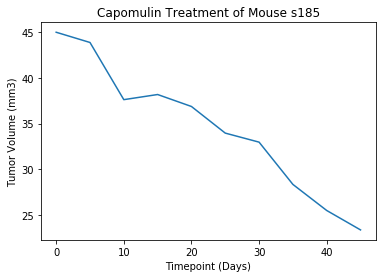

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Mouse_Capomulin = df.loc[df["Drug Regimen"] == "Capomulin"]
Mouse_Capomulin.head(15)

M_C_1 = df.loc[df['Mouse ID'] == "s185"]
M_C_1.head(15)
M_C_1.columns

M_C_2 = M_C_1[["Timepoint", "Tumor Volume (mm3)"]]
print(M_C_2)

plt.plot(M_C_2["Timepoint"], M_C_2["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse s185")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()


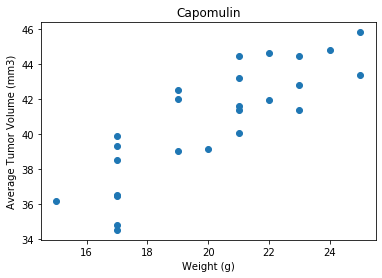

In [33]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

len(Mouse_Capomulin["Mouse ID"].unique())
#25 mouse count for Capomulin drug regimen

Mouse_Capomulin["Mouse ID"].unique()
#'s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
#       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
#       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
#       'r157'
 
#use for to iterate through mice? Need to learn for, iteration
#iterate and append list/dictionary/DF
#***

a1_df = df.loc[df['Mouse ID'] == 's185']
a1_w = a1_df.values[0,4]
a1_av = np.mean(a1_df["Tumor Volume (mm3)"])
a2_df = df.loc[df['Mouse ID'] == 'm601']
a2_w = a2_df.values[0,4]
a2_av = np.mean(a2_df["Tumor Volume (mm3)"])
a3_df = df.loc[df['Mouse ID'] == 'f966']
a3_w = a3_df.values[0,4]
a3_av = np.mean(a3_df["Tumor Volume (mm3)"])
a4_df = df.loc[df['Mouse ID'] == 'u364']
a4_w = a4_df.values[0,4]
a4_av = np.mean(a4_df["Tumor Volume (mm3)"])
a5_df = df.loc[df['Mouse ID'] == 'y793']
a5_w = a5_df.values[0,4]
a5_av = np.mean(a5_df["Tumor Volume (mm3)"])

a6_df = df.loc[df['Mouse ID'] == 'r554']
a6_w = a6_df.values[0,4]
a6_av = np.mean(a6_df["Tumor Volume (mm3)"])
a7_df = df.loc[df['Mouse ID'] == 'm957']
a7_w = a7_df.values[0,4]
a7_av = np.mean(a7_df["Tumor Volume (mm3)"])
a8_df = df.loc[df['Mouse ID'] == 't565']
a8_w = a8_df.values[0,4]
a8_av = np.mean(a8_df["Tumor Volume (mm3)"])
a9_df = df.loc[df['Mouse ID'] == 'i738']
a9_w = a9_df.values[0,4]
a9_av = np.mean(a9_df["Tumor Volume (mm3)"])
a10_df = df.loc[df['Mouse ID'] == 'w914']
a10_w = a10_df.values[0,4]
a10_av = np.mean(a10_df["Tumor Volume (mm3)"])

a11_df = df.loc[df['Mouse ID'] == 'g288']
a11_w = a11_df.values[0,4]
a11_av = np.mean(a11_df["Tumor Volume (mm3)"])
a12_df = df.loc[df['Mouse ID'] == 'l897']
a12_w = a12_df.values[0,4]
a12_av = np.mean(a12_df["Tumor Volume (mm3)"])
a13_df = df.loc[df['Mouse ID'] == 'b742']
a13_w = a13_df.values[0,4]
a13_av = np.mean(a13_df["Tumor Volume (mm3)"])
a14_df = df.loc[df['Mouse ID'] == 'b128']
a14_w = a14_df.values[0,4]
a14_av = np.mean(a14_df["Tumor Volume (mm3)"])
a15_df = df.loc[df['Mouse ID'] == 'j246']
a15_w = a15_df.values[0,4]
a15_av = np.mean(a15_df["Tumor Volume (mm3)"])

a16_df = df.loc[df['Mouse ID'] == 'j119']
a16_w = a16_df.values[0,4]
a16_av = np.mean(a16_df["Tumor Volume (mm3)"])
a17_df = df.loc[df['Mouse ID'] == 'w150']
a17_w = a17_df.values[0,4]
a17_av = np.mean(a17_df["Tumor Volume (mm3)"])
a18_df = df.loc[df['Mouse ID'] == 'v923']
a18_w = a18_df.values[0,4]
a18_av = np.mean(a18_df["Tumor Volume (mm3)"])
a19_df = df.loc[df['Mouse ID'] == 'g316']
a19_w = a19_df.values[0,4]
a19_av = np.mean(a19_df["Tumor Volume (mm3)"])
a20_df = df.loc[df['Mouse ID'] == 's710']
a20_w = a20_df.values[0,4]
a20_av = np.mean(a20_df["Tumor Volume (mm3)"])

a21_df = df.loc[df['Mouse ID'] == 'l509']
a21_w = a21_df.values[0,4]
a21_av = np.mean(a21_df["Tumor Volume (mm3)"])
a22_df = df.loc[df['Mouse ID'] == 'r944']
a22_w = a22_df.values[0,4]
a22_av = np.mean(a22_df["Tumor Volume (mm3)"])
a23_df = df.loc[df['Mouse ID'] == 'i557']
a23_w = a23_df.values[0,4]
a23_av = np.mean(a23_df["Tumor Volume (mm3)"])
a24_df = df.loc[df['Mouse ID'] == 'r157']
a24_w = a24_df.values[0,4]
a24_av = np.mean(a24_df["Tumor Volume (mm3)"])
a25_df = df.loc[df['Mouse ID'] == 'x401']
a25_w = a25_df.values[0,4]
a25_av = np.mean(a25_df["Tumor Volume (mm3)"])

#'s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
#       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
#       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
#       'r157'

x_values = [a1_w, a2_w, a3_w, a4_w, a5_w, 
          a6_w, a7_w, a8_w, a9_w, a10_w,
          a11_w, a12_w, a13_w, a14_w, a15_w,
          a16_w, a17_w, a18_w, a19_w, a20_w,
          a21_w, a22_w, a23_w, a24_w, a25_w]

y_values = [a1_av, a2_av, a3_av, a4_av, a5_av, 
          a6_av, a7_av, a8_av, a9_av, a10_av,
          a11_av, a12_av, a13_av, a14_av, a15_av,
          a16_av, a17_av, a18_av, a19_av, a20_av,
          a21_av, a22_av, a23_av, a24_av, a25_av]

plt.scatter(x_values, y_values)
plt.title("Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


#print(a1_df["Tumor Volume (mm3)"].average())
#print(a1_df)
#a1_df
#["Weight (g)": [1,1]]
#a1 = average()
#x_values = 

## Correlation and Regression

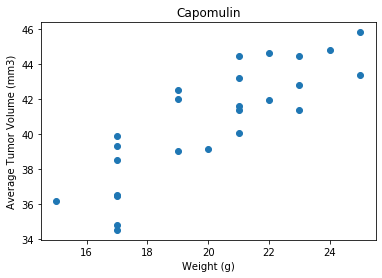

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

plt.scatter(x_values, y_values)
plt.title("Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


The r value is: 0.8419363424694718
The r squared value is: 0.7088568047708717


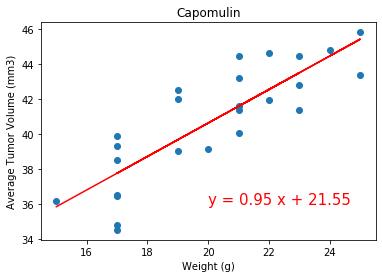

In [35]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#print(slope)

#slope = int(slope)
#print(slope)
#print(x_values.type())

#Work around for TypeError: can't multiply sequence by non-int of type 'numpy.float64'

x_values2 = []
for x in x_values:
    x_values2.append(x*slope)   
#print(x_values2)

regress_values = x_values2 + intercept

print(f"The r value is: {rvalue}")
print(f"The r squared value is: {rvalue**2}")

# ### FIGURE C ### #
line_eq = "y = " + str(round(slope, 2)) + " x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,36), fontsize=15, color = "red")
plt.title("Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


In [36]:
#test for work around above
#x_values = [1,2,3,4]
#x_values2 = []
#for x in x_values:
#    x_values2.append(x*2.14564)
    
#print(x_values2)